Dataset carregado. Shape original: (22784, 17)
Coluna 'binaryClass' limpa com sucesso!
Nenhum valor ausente encontrado na coluna 'binaryClass'.
Shape após remover nulos (se houver): (22784, 17)

--- Divisão Estratificada bem-sucedida ---
Shape de X_train: (18227, 16)
Shape de X_test: (4557, 16)
Shape de y_train: (18227,)
Shape de y_test: (4557,)

Proporção de Classes no Conjunto de Treino:
binaryClass
P   0.70401
N   0.29599
Name: proportion, dtype: float64

Proporção de Classes no Conjunto de Teste:
binaryClass
P   0.70397
N   0.29603
Name: proportion, dtype: float64


--- 1. Informações Gerais das Features (Tipos de Dados e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
Index: 18227 entries, 16944 to 2196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        18227 non-null  float64
 1   HouseholdSize     18227 non-null  float64
 2   RacePctWhite      18227 non-null  float64
 3   RentQran

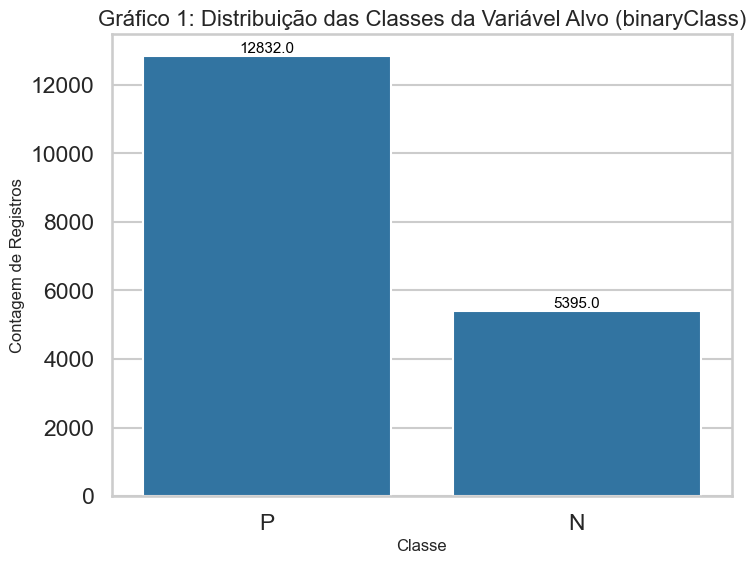



--- Gerando Gráfico 2: Renda Mediana por Classe ---


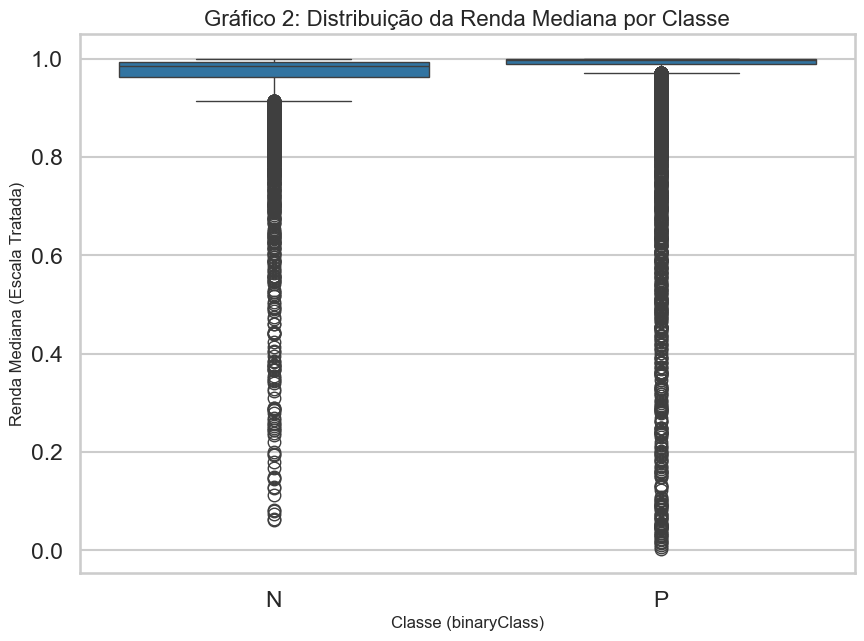



--- Gerando Gráfico 3: Taxa de Desemprego por Classe ---


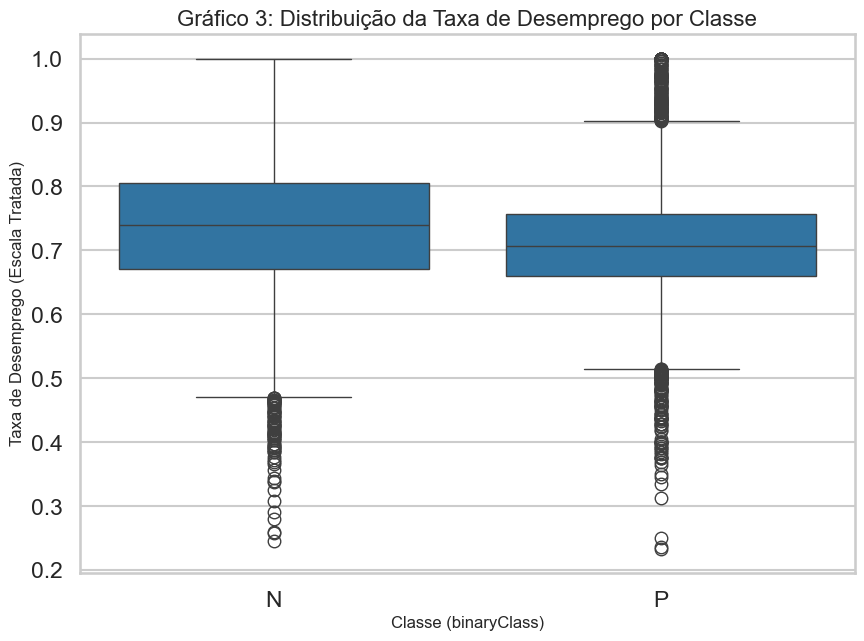



--- Gerando Gráfico 4: Matriz de Correlação das Features ---


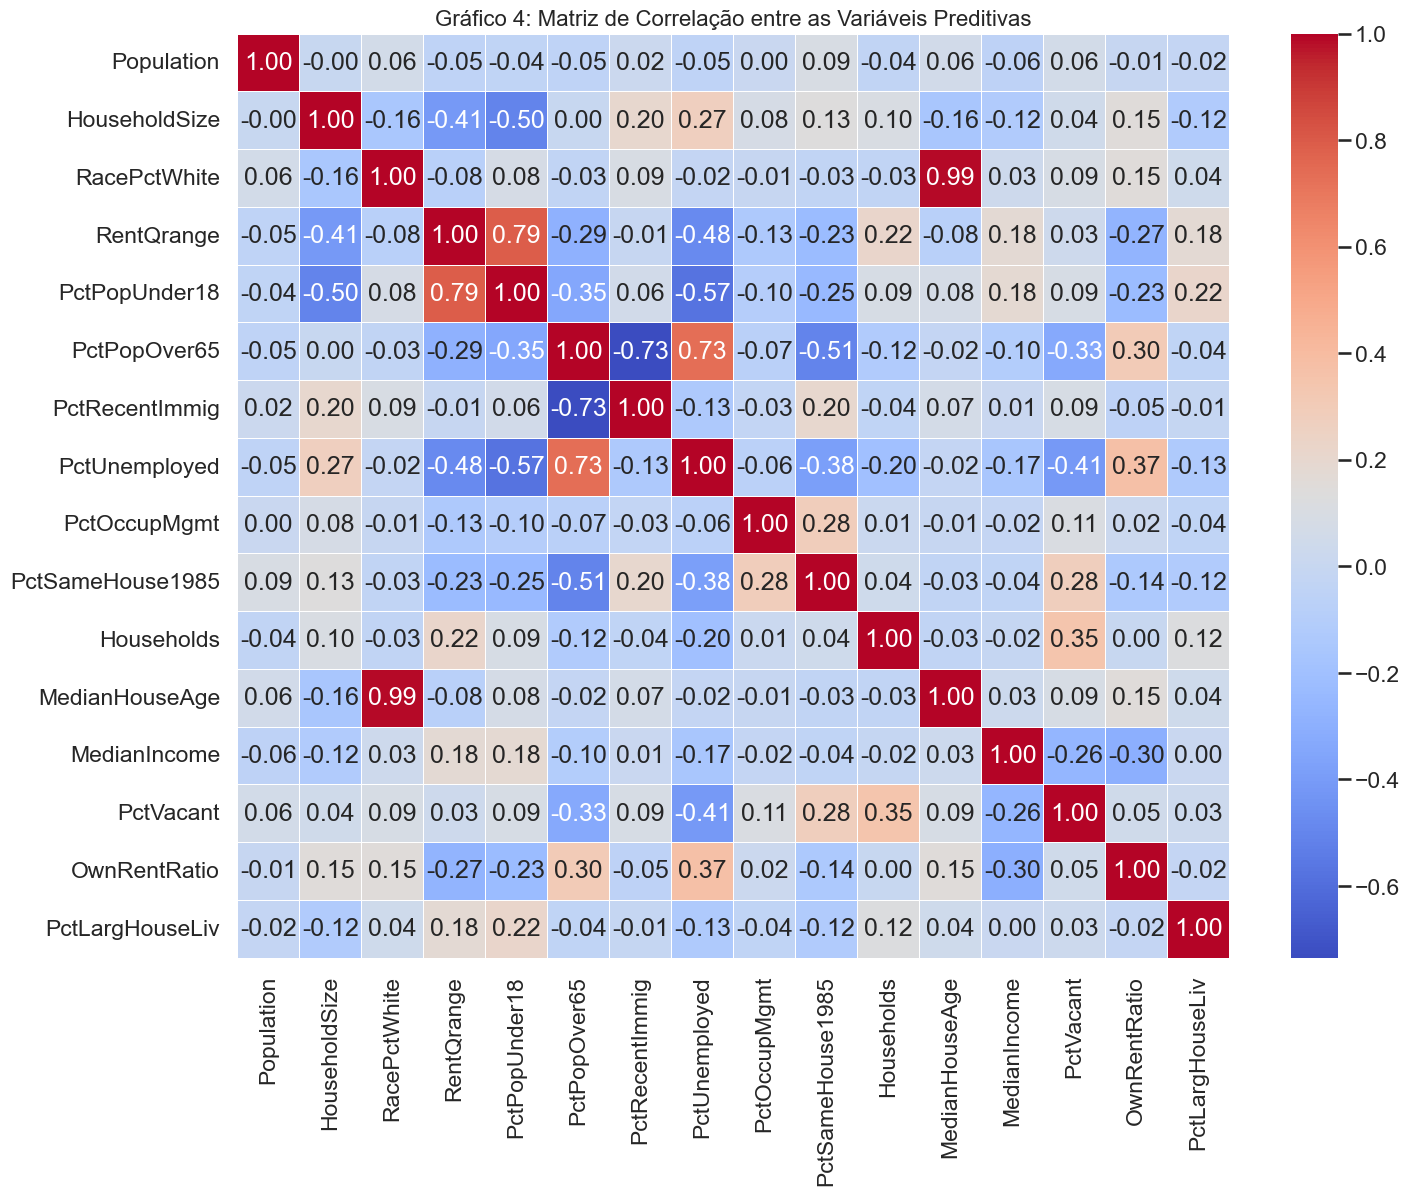



--- Análise Exploratória de Dados Concluída ---


In [2]:
# -*- coding: utf-8 -*-
"""
EDA.ipynb

Análise Exploratória de Dados (EDA) para o dataset house_data_classificacao.
Fase 2 do CRISP-DM para o problema de classificação.
"""

# --- Importando Bibliotecas Essenciais ---
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- PASSO 0: CARREGAMENTO E LIMPEZA DEFINITIVA ---

# Carregar o dataset
try:
    df_class = pd.read_csv('house_data_classificacao.csv')
    print(f"Dataset carregado. Shape original: {df_class.shape}")
except FileNotFoundError:
    print("Erro: O arquivo 'house_data_classificacao.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo está no mesmo diretório.")
    # Interrompe a execução se o arquivo não for encontrado
    exit()


# CORREÇÃO: Limpando a string para remover os caracteres extras "b'" e "'"
# Isso transforma "b'N'" em "N" e "b'P'" em "P"
df_class['binaryClass'] = df_class['binaryClass'].str.replace("b'", "").str.replace("'", "")
print("Coluna 'binaryClass' limpa com sucesso!")

# Verificar e remover quaisquer valores nulos que possam existir na coluna alvo
missing_target_count = df_class['binaryClass'].isnull().sum()
if missing_target_count > 0:
    print(f"Encontrados {missing_target_count} valores ausentes na coluna 'binaryClass'. Removendo...")
    df_class.dropna(subset=['binaryClass'], inplace=True)
else:
    print("Nenhum valor ausente encontrado na coluna 'binaryClass'.")
print(f"Shape após remover nulos (se houver): {df_class.shape}")


# --- Divisão Estratificada dos Dados ---
X = df_class.drop('binaryClass', axis=1)
y = df_class['binaryClass']

# Divisão em 80% treino e 20% teste, estratificando pela variável alvo 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Divisão Estratificada bem-sucedida ---")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")
print("\nProporção de Classes no Conjunto de Treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de Classes no Conjunto de Teste:")
print(y_test.value_counts(normalize=True))

# --- Preparação para Visualizações ---
# Juntando os dados de treino para facilitar as visualizações bivariadas
train_df = pd.concat([X_train, y_train], axis=1)

# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
sns.set_context("talk") # Aumenta um pouco o tamanho das fontes e elementos


# --- PASSO 1: DESCRIÇÃO GERAL DOS DADOS DE TREINO ---

print("\n\n--- 1. Informações Gerais das Features (Tipos de Dados e Nulos) ---")
import io
buffer = io.StringIO()
X_train.info(buf=buffer)
info_output = buffer.getvalue()
print(info_output)


print("\n\n--- 2. Estatísticas Descritivas das Variáveis Numéricas ---")
pd.set_option('display.float_format', lambda x: '%.5f' % x) # Formata floats
print(X_train.describe().T)


print("\n\n--- 3. Contagem de Valores Ausentes (NaN) por Feature ---")
missing_values_features = X_train.isnull().sum()
if missing_values_features.sum() == 0:
    print("Ótima notícia: Não há valores ausentes nas features do conjunto de treino!")
else:
    missing_percentage = (missing_values_features / len(X_train)) * 100
    missing_df = pd.DataFrame({'contagem_nulos': missing_values_features, 'percentual_nulos': missing_percentage})
    print(missing_df[missing_df['contagem_nulos'] > 0])


# --- GRÁFICO 1: ANÁLISE UNIVARIADA DA VARIÁVEL ALVO ---
print("\n\n--- Gerando Gráfico 1: Distribuição das Classes ---")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='binaryClass', order=['P', 'N']) # Garante a ordem P, N
plt.title('Gráfico 1: Distribuição das Classes da Variável Alvo (binaryClass)', fontsize=16)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Contagem de Registros', fontsize=12)

# Adicionando os valores exatos em cima das barras
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


# --- PASSO 2: ANÁLISE BIVARIADA (FEATURE vs. CLASSE) ---

# --- 2.1 Comparando a Renda Mediana entre as Classes (Gráfico 2) ---
print("\n\n--- Gerando Gráfico 2: Renda Mediana por Classe ---")
plt.figure(figsize=(10, 7))
sns.boxplot(data=train_df, x='binaryClass', y='MedianIncome', order=['N', 'P'])
plt.title('Gráfico 2: Distribuição da Renda Mediana por Classe', fontsize=16)
plt.xlabel('Classe (binaryClass)', fontsize=12)
plt.ylabel('Renda Mediana (Escala Tratada)', fontsize=12)
plt.show()

# --- 2.2 Comparando a Taxa de Desemprego entre as Classes (Gráfico 3) ---
print("\n\n--- Gerando Gráfico 3: Taxa de Desemprego por Classe ---")
plt.figure(figsize=(10, 7))
sns.boxplot(data=train_df, x='binaryClass', y='PctUnemployed', order=['N', 'P'])
plt.title('Gráfico 3: Distribuição da Taxa de Desemprego por Classe', fontsize=16)
plt.xlabel('Classe (binaryClass)', fontsize=12)
plt.ylabel('Taxa de Desemprego (Escala Tratada)', fontsize=12)
plt.show()

# --- 2.3 Matriz de Correlação entre as Features (Gráfico 4) ---
print("\n\n--- Gerando Gráfico 4: Matriz de Correlação das Features ---")
plt.figure(figsize=(16, 12))
correlation_matrix = X_train.corr() # Correlação apenas das features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Gráfico 4: Matriz de Correlação entre as Variáveis Preditivas', fontsize=16)
plt.show()

print("\n\n--- Análise Exploratória de Dados Concluída ---")